In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import pickle


In [2]:
zip_dataset = '/content/drive/MyDrive/crop_dataset.zip'
dataset = '/content/drive/MyDrive/crop_dataset'
# with zipfile.ZipFile(zip_dataset, 'r') as zip_ref:
#     zip_ref.extractall(dataset)
#     print("files extracted")

In [3]:
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
def extract_features(dataset, model):
    features = []
    labels = []
    class_names = sorted(os.listdir(dataset))  # Ensure consistent class ordering
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset, class_name)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = preprocess_input(img_array)
            img_array = np.expand_dims(img_array, axis=0)

            # Extract features
            feature = model.predict(img_array)
            features.append(feature.flatten())  # Flatten the features
            labels.append(label)
    return np.array(features), np.array(labels), class_names


In [5]:
train_dir = '/content/drive/MyDrive/crop_dataset/crop_desease_dataset/train'
test_dir = '/content/drive/MyDrive/crop_dataset/crop_desease_dataset/test'

In [6]:
# Reduce batch size
batch_size = 16  # or even lower, depending on your memory limits
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/crop_dataset/crop_desease_dataset/train',
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=False
)

Found 3440 files belonging to 13 classes.


In [7]:
X_train, y_train, class_names = extract_features(train_dir, cnn_model)
X_test, y_test, _ = extract_features(test_dir, cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━

In [13]:
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in cnn_model.layers:
    layer.trainable = False

# Add custom layers on top
model = tf.keras.Sequential([
    cnn_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Test Accuracy: 82.41%
Classification Report:
                            precision    recall  f1-score   support

               corn_Blight       0.82      0.71      0.76       138
          corn_Common_Rust       0.95      0.91      0.93       145
       corn_Gray_Leaf_Spot       0.81      0.80      0.80       141
        maize_streak virus       0.89      0.94      0.91       163
rice_Bacterial leaf blight       0.75      1.00      0.86        18
           rice_Brown spot       0.89      0.50      0.64        16
            rice_Leaf smut       0.79      0.83      0.81        18
          sugarcane_Mosaic       0.83      0.95      0.89       112
          sugarcane_RedRot       0.62      0.83      0.71       123
            sugarcane_Rust       0.78      0.72      0.75       115
          sugarcane_Yellow       0.77      0.61      0.68       123
            wheat_septoria       0.95      1.00      0.97        37
         wheat_stripe_rust       0.96      0.90      0.93        90

 

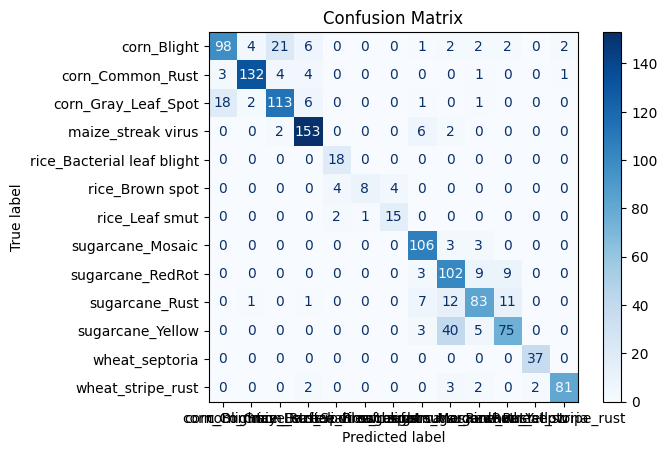

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test_scaled, y_test, display_labels=class_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



In [30]:
import pickle

# Save the SVM model
with open('/content/drive/MyDrive/svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

# Save the scaler
with open('/content/drive/MyDrive/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save class names
with open('/content/drive/MyDrive/class_names.pkl', 'wb') as f:
    pickle.dump(class_names, f)


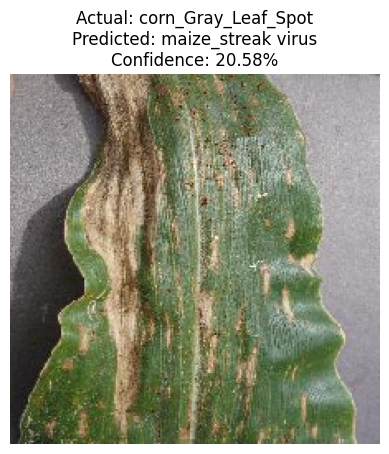

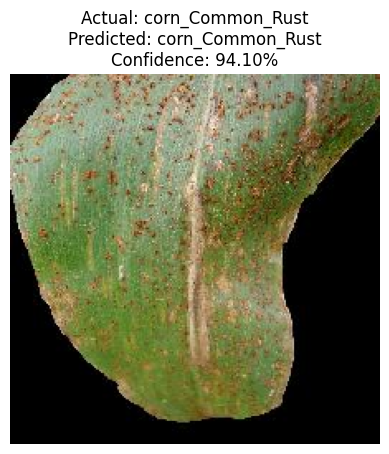

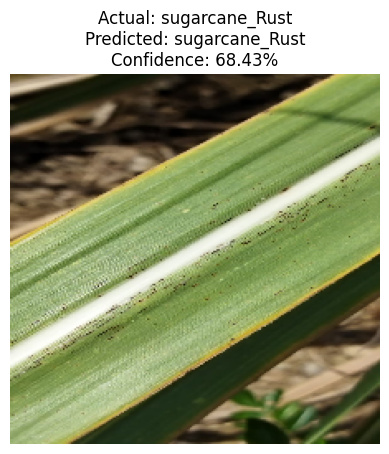

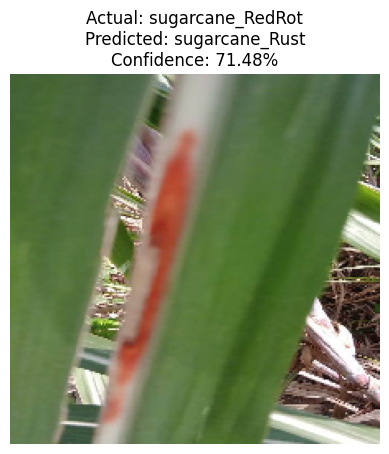

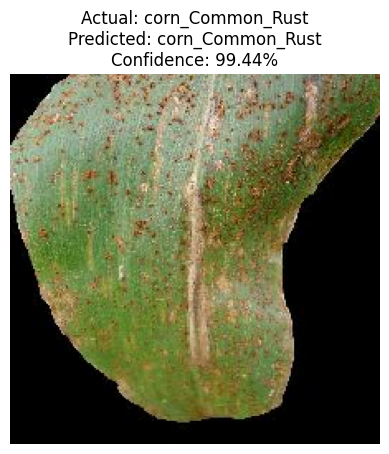

In [31]:
# Visualize predictions with confidence scores
for i in range(8):
    idx = np.random.randint(0, len(X_test))
    img_feature = X_test_scaled[idx].reshape(1, -1)
    prediction = svm_classifier.predict(img_feature)
    probabilities = svm_classifier.predict_proba(img_feature)

    actual_class = class_names[y_test[idx]]
    predicted_class = class_names[prediction[0]]
    confidence = probabilities[0][prediction[0]] * 100

    # Display the image
    img_path = os.path.join(test_dir, class_names[y_test[idx]], os.listdir(os.path.join(test_dir, class_names[y_test[idx]]))[0])
    img = load_img(img_path, target_size=(224, 224))

    plt.imshow(img)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()


In [34]:
import tensorflow as tf
print(tf.__version__)

2.17.1
